In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Bike Share Data Analysis.csv')
df.head()

,DATE,SEASON,YEAR,WEEKDAY,HOUR,RIDER_TYPE,RIDERS,PRICE,COGS,REVENUE,PROFIT
0,2021-01-01,1,0,6,22,casual,11,3.99,1.24,43.89,30.25
1,2021-01-01,1,0,6,14,casual,35,3.99,1.24,139.65,96.25
2,2021-01-01,1,0,6,6,registered,0,3.99,1.24,0.00,0.00
3,2021-01-01,1,0,6,3,registered,10,3.99,1.24,39.90,27.50
4,2021-01-01,1,0,6,16,casual,41,3.99,1.24,163.59,112.75


In [3]:
df.columns.str.lower()

Index(['date', 'season', 'year', 'weekday', 'hour', 'rider_type', 'riders',
       'price', 'cogs', 'revenue', 'profit'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower()
df.head()

,date,season,year,weekday,hour,rider_type,riders,price,cogs,revenue,profit
0,2021-01-01,1,0,6,22,casual,11,3.99,1.24,43.89,30.25
1,2021-01-01,1,0,6,14,casual,35,3.99,1.24,139.65,96.25
2,2021-01-01,1,0,6,6,registered,0,3.99,1.24,0.00,0.00
3,2021-01-01,1,0,6,3,registered,10,3.99,1.24,39.90,27.50
4,2021-01-01,1,0,6,16,casual,41,3.99,1.24,163.59,112.75


In [5]:
np.round(df.describe(), 2)

,season,year,weekday,hour,riders,price,cogs,revenue,profit
count,34758.00,34758.0,34758.00,34758.00,34758.00,34758.00,34758.00,34758.00,34758.00
mean,2.50,0.5,3.00,11.55,94.73,4.49,1.40,436.95,300.61
std,1.11,0.5,2.01,6.91,127.11,0.50,0.16,610.95,420.09
min,1.00,0.0,0.00,0.00,0.00,3.99,1.24,0.00,0.00
25%,2.00,0.0,1.00,6.00,9.00,3.99,1.24,39.90,27.44
50%,3.00,1.0,3.00,12.00,43.00,4.99,1.56,189.62,130.34
75%,3.00,1.0,5.00,18.00,134.00,4.99,1.56,593.81,408.17
max,4.00,1.0,6.00,23.00,886.00,4.99,1.56,4421.14,3038.98


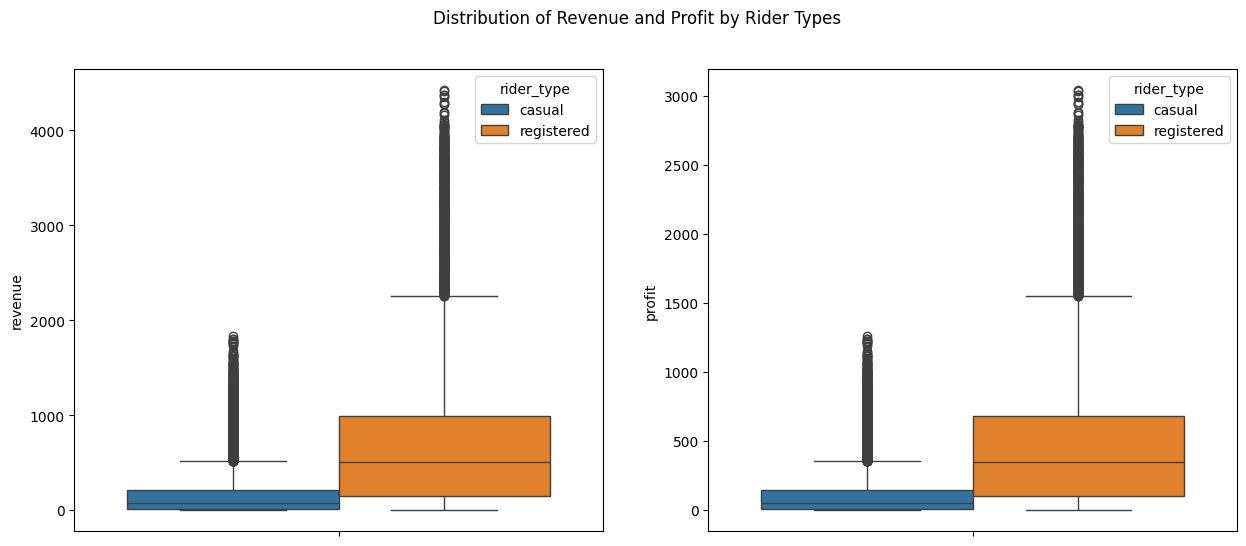

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.boxplot(y = df['revenue'], hue = df['rider_type'], ax = ax[0])
sns.boxplot(y = df['profit'], hue = df['rider_type'], ax = ax[1])
plt.suptitle("Distribution of Revenue and Profit by Rider Types")
plt.show()

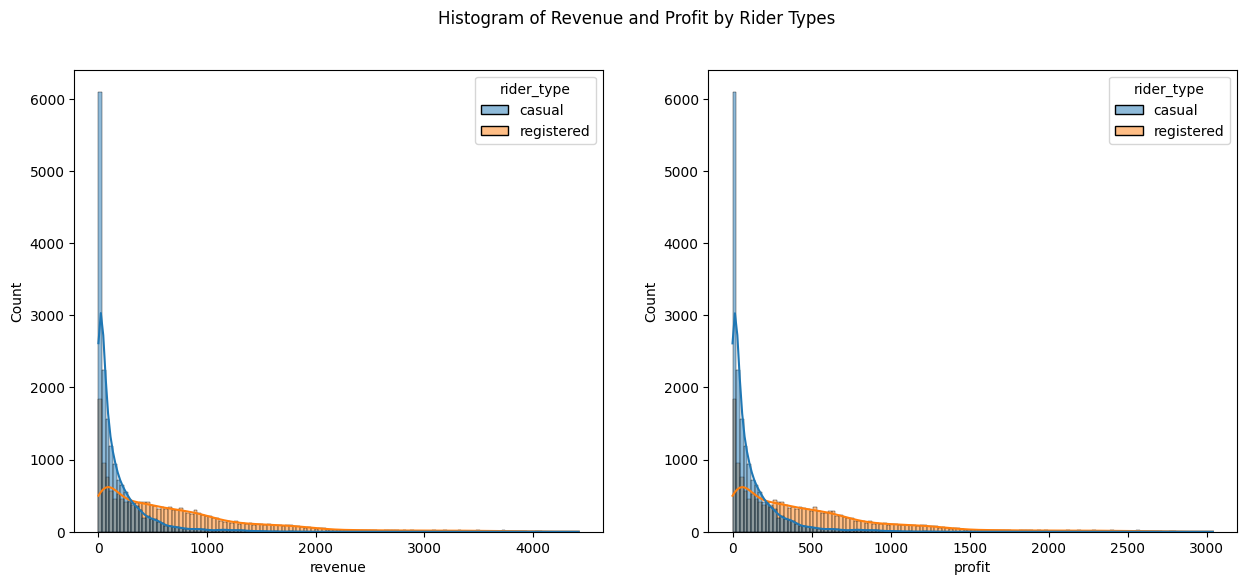

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(data = df, x = 'revenue', hue = 'rider_type', kde = True , ax = ax[0])
sns.histplot(data = df, x = 'profit', hue = 'rider_type', kde = True, ax = ax[1])
plt.suptitle("Histogram of Revenue and Profit by Rider Types")
plt.show()

# **A/B Test**

### **A/B Testing in Practice**

A/B testing is a statistical method used to compare two versions (A and B) of a subject to determine which version performs better. In the context of website optimization, this could mean comparing two different button colors, two different page layouts, or two different email subject lines.

***Statistical Methods for A/B Testing***

There are two primary statistical methods used for A/B testing:

**Independent Samples t-Test:** This is a parametric test used when the data is normally distributed. It compares the means of two groups to determine if there is a statistically significant difference between them.


**Mann-Whitney U Test:** This is a non-parametric test used when the data is not normally distributed. It compares the ranks of the two groups to determine if there is a statistically significant difference between them.
Steps Involved in A/B Testing

***1. Testing Normality:***

**Shapiro-Wilk Test:** This test is used to determine if the data is normally distributed.
If the p-value > 0.05, we cannot reject the null hypothesis (H₀), which means the data is normally distributed.
If the p-value < 0.05, we reject the null hypothesis (H₀), which means the data is not normally distributed.


***2. Choosing the Appropriate Test:***

If the data is normally distributed, use the independent samples t-test.
If the data is not normally distributed, use the Mann-Whitney U Test.


***3. Independent Samples t-Test:***

**Testing Homogeneity of Variances:**

**Levene's Test:** This test is used to determine if the variances of the two groups are equal.
If the p-value > 0.05, we cannot reject the null hypothesis (H₀), which means the variances are equal.
If the p-value < 0.05, we reject the null hypothesis (H₀), which means the variances are not equal.

**Calculating the t-value and p-value:**

If the variances are equal, set the equal_var parameter to True.
If the variances are not equal, set the equal_var parameter to False.


***4. Mann-Whitney U Test:***

Calculate the U statistic and p-value using the mannwhitneyu function from the scipy.stats library.


***5. Interpreting the Results:***

**Independent Samples t-Test:** If the p-value < 0.05, we reject the null hypothesis (H₀), which means there is a statistically significant difference between the means of the two groups.

If the p-value > 0.05, we cannot reject the null hypothesis (H₀), which means there is no statistically significant difference between the means of the two groups.

**Mann-Whitney U Test:** If the p-value < 0.05, we reject the null hypothesis (H₀), which means the distribution of the values of the two groups is not equal.

If the p-value > 0.05, we cannot reject the null hypothesis (H₀), which means the distribution of the values of the two groups is equal.

### ***Here, I analyzed whether rider demographics (rider types) have an impact on revenue and profit.***

In [8]:
from scipy.stats import shapiro

In [9]:
df.groupby('rider_type')['rider_type'].count()

rider_type
casual        17379
registered    17379
Name: rider_type, dtype: int64

In [10]:
casual_revenue = df[df['rider_type'] == 'casual']['revenue']
registered_revenue = df[df['rider_type'] == 'registered']['revenue']
casual_revenue.shape, registered_revenue.shape

((17379,), (17379,))

In [11]:
def normality_test(data):
    """
    Performs the Shapiro-Wilk test for normality on the given dataset.

    Parameters:
    ----------
    data : array-like
        A one-dimensional array or list containing the data points to test for normality.

    Returns:
    -------
    None
        Prints the test statistic, p-value, and a conclusion about the normality of the data.

    The function evaluates the null hypothesis (H0) that the data is normally distributed:
    - If p-value > 0.05: Fail to reject H0 (data is likely normally distributed).
    - If p-value <= 0.05: Reject H0 (data is not normally distributed).

    Example:
    --------
    >>> from scipy.stats import shapiro
    >>> data = [1.2, 2.3, 3.1, 4.5, 5.6, 6.7]
    >>> normality_test(data)
    Test Statistic: 0.9671739339828491
    P-value: 0.7845304608345032
    Data looks normally distributed (fail to reject H0).
    """
    stat, p_value = shapiro(data)
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value > 0.05:
        print("Data looks normally distributed (fail to reject H0).")
    else:
        print("Data does not look normally distributed (reject H0).")

In [12]:
normality_test(data = casual_revenue)

Test Statistic: 0.6861113543186752
P-value: 2.1560084667563593e-100
Data does not look normally distributed (reject H0).


In [13]:
normality_test(data = registered_revenue)

Test Statistic: 0.8264534423023383
P-value: 4.392781581579257e-86
Data does not look normally distributed (reject H0).


In [14]:
from scipy.stats import mannwhitneyu

In [15]:
def non_parametric_test(group_a, group_b, group_names, test_measure):
    """
    Performs the Mann-Whitney U test to compare the distributions of two independent groups.

    Parameters:
    ----------
    group_a : array-like
        The first group of data points to be compared.
    group_b : array-like
        The second group of data points to be compared.
    group_names : str
        A descriptive name of the two groups being compared (e.g., "casual and registered").
    test_measure : str
        The measure being tested (e.g., "revenue", "profit", "riders").

    Returns:
    -------
    None
        Prints the test statistic, p-value, and a conclusion about whether there is a significant difference 
        between the two groups.

    The function evaluates the null hypothesis (H0) that the distributions of the two groups are equal:
    - If p-value > 0.05: Fail to reject H0 (no significant difference between the groups).
    - If p-value <= 0.05: Reject H0 (significant difference between the groups).

    Example:
    --------
    >>> from scipy.stats import mannwhitneyu
    >>> group_a = [5, 7, 8, 9, 10]
    >>> group_b = [3, 4, 6, 7, 9]
    >>> non_parametric_test(group_a, group_b, "casual and registered", "revenue")
    Test Statistic: 10.5
    P-value: 0.421
    The distribution of the values of two groups are equal (fail to reject H0). 
    There is no significant difference between the revenue of casual and registered riders.
    """
    stat, p_value = mannwhitneyu(group_a, group_b)
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value > 0.05:
        print(f"The distribution of the values of two groups are equal (fail to reject H0). "
              f"There is no significant difference between the {test_measure} of {group_names} riders")
    else:
        print(f"The distribution of the values of two groups are not equal (reject H0). "
              f"There is a significant difference between the {test_measure} of {group_names} riders")

In [16]:
non_parametric_test(group_a = casual_revenue, group_b = registered_revenue, 
                    group_names = "'Registered' and 'Casual'", test_measure = 'Revenue')

Test Statistic: 62178054.0
P-value: 0.0
The distribution of the values of two groups are not equal (reject H0). There is a significant difference between the Revenue of 'Registered' and 'Casual' riders


In [17]:
revenue_riders = np.round(df.groupby('rider_type')['revenue'].mean().sort_values(ascending = False).reset_index(), 2)
revenue_riders

,rider_type,revenue
0,registered,710.09
1,casual,163.80


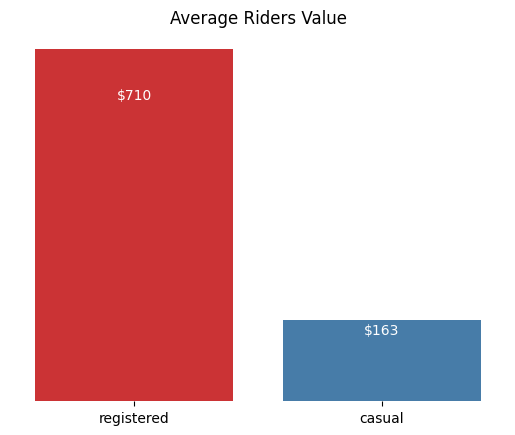

In [18]:
sns.barplot(data = revenue_riders, x = 'rider_type', y = 'revenue', hue = 'rider_type', palette = 'Set1')

# Remove yticks
plt.gca().set_yticks([])

# Add values inside the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 1.15  # Adjust y-coordinate to center the text within the bar
    ax.text(x, y, f'${int(height)}', ha='center', va='center', color = 'white')

# Remove spines (borders)
sns.despine(left=True, bottom=True)

plt.xlabel("")
plt.ylabel("")
plt.title("Average Riders Value")
plt.show()

In [19]:
casual_profit = df[df['rider_type'] == 'casual']['profit']
registered_profit = df[df['rider_type'] == 'registered']['profit']
casual_profit.shape, registered_profit.shape

((17379,), (17379,))

In [20]:
normality_test(data = casual_profit)

Test Statistic: 0.6863937877497563
P-value: 2.2711060427034865e-100
Data does not look normally distributed (reject H0).


In [21]:
normality_test(data = registered_profit)

Test Statistic: 0.8267668225287035
P-value: 4.83800887218851e-86
Data does not look normally distributed (reject H0).


In [22]:
non_parametric_test(group_a = casual_profit, group_b = registered_profit, 
                    group_names = "'Registered' and 'Casual'", test_measure = 'Profit')

Test Statistic: 62148313.5
P-value: 0.0
The distribution of the values of two groups are not equal (reject H0). There is a significant difference between the Profit of 'Registered' and 'Casual' riders


In [23]:
profit_riders = np.round(df.groupby('rider_type')['profit'].mean().sort_values(ascending = False).reset_index(), 2)
profit_riders

,rider_type,profit
0,registered,488.52
1,casual,112.70


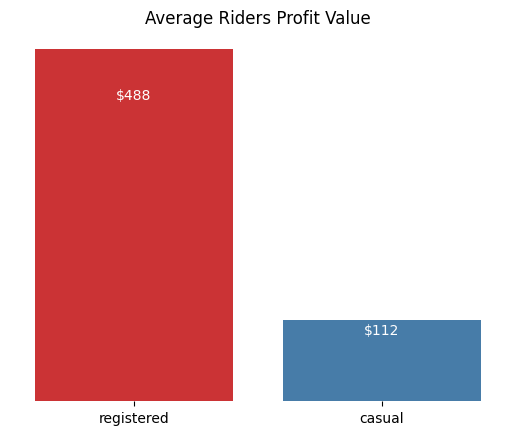

In [24]:
sns.barplot(data = profit_riders, x = 'rider_type', y = 'profit', hue = 'rider_type', palette = 'Set1')

# Remove yticks
plt.gca().set_yticks([])

# Add values inside the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 1.15  # Adjust y-coordinate to center the text within the bar
    ax.text(x, y, f'${int(height)}', ha='center', va='center', color = 'white')

# Remove spines (borders)
sns.despine(left=True, bottom=True)

plt.xlabel("")
plt.ylabel("")
plt.title("Average Riders Profit Value")
plt.show()

In [25]:
riders_count = np.round(df.groupby('rider_type')['riders'].sum().sort_values(ascending = False).reset_index(), 2)
riders_count

,rider_type,riders
0,registered,2672662
1,casual,620017


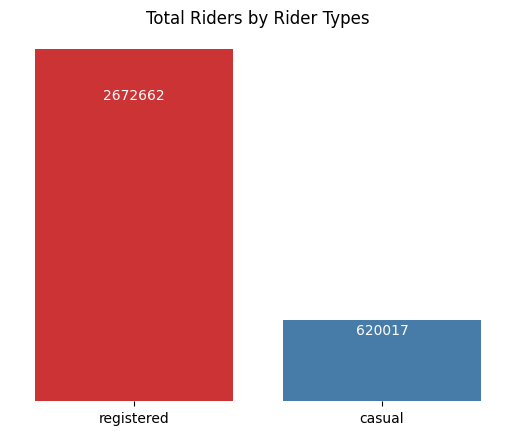

In [26]:
sns.barplot(data = riders_count, x = 'rider_type', y = 'riders', hue = 'rider_type', palette = 'Set1')

# Remove yticks
plt.gca().set_yticks([])

# Add values inside the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 1.15  # Adjust y-coordinate to center the text within the bar
    ax.text(x, y, f'{int(height)}', ha='center', va='center', color = 'white')

# Remove spines (borders)
sns.despine(left=True, bottom=True)

plt.xlabel("")
plt.ylabel("")
plt.title("Total Riders by Rider Types")
plt.show()

# Summary of Analysis on Rider Demographics and Their Influence on Revenue and Profit  

The analysis evaluated the impact of rider demographics (rider types) on revenue, profit, and rider counts. Key findings are as follows:

## 1. Revenue Comparison  
- The revenue distribution between 'Registered' and 'Casual' riders is significantly different (**reject H0**).  
- **Average Revenue:**  
  - Registered riders: **710.09**  
  - Casual riders: **163.80**  

## 2. Profit Comparison  
- The profit distribution between 'Registered' and 'Casual' riders is significantly different (**reject H0**).  
- **Average Profit:**  
  - Registered riders: **488.52**  
  - Casual riders: **112.70**  

## 3. Rider Count  
- The total number of riders also highlights a considerable difference:  
  - Registered riders: **2,672,662**  
  - Casual riders: **620,017**  

## Conclusion  
Rider demographics significantly influence both revenue and profit, with 'Registered' riders contributing substantially more to both metrics than 'Casual' riders.


In [27]:
df.dtypes

date           object
season          int64
year            int64
weekday         int64
hour            int64
rider_type     object
riders          int64
price         float64
cogs          float64
revenue       float64
profit        float64
dtype: object

In [28]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date          datetime64[ns]
season                 int64
year                   int64
weekday                int64
hour                   int64
rider_type            object
riders                 int64
price                float64
cogs                 float64
revenue              float64
profit               float64
dtype: object

In [29]:
df.head()

,date,season,year,weekday,hour,rider_type,riders,price,cogs,revenue,profit
0,2021-01-01,1,0,6,22,casual,11,3.99,1.24,43.89,30.25
1,2021-01-01,1,0,6,14,casual,35,3.99,1.24,139.65,96.25
2,2021-01-01,1,0,6,6,registered,0,3.99,1.24,0.00,0.00
3,2021-01-01,1,0,6,3,registered,10,3.99,1.24,39.90,27.50
4,2021-01-01,1,0,6,16,casual,41,3.99,1.24,163.59,112.75


In [30]:
df['start_of_month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df.head()

,date,season,year,weekday,hour,rider_type,riders,price,cogs,revenue,profit,start_of_month
0,2021-01-01,1,0,6,22,casual,11,3.99,1.24,43.89,30.25,2021-01-01
1,2021-01-01,1,0,6,14,casual,35,3.99,1.24,139.65,96.25,2021-01-01
2,2021-01-01,1,0,6,6,registered,0,3.99,1.24,0.00,0.00,2021-01-01
3,2021-01-01,1,0,6,3,registered,10,3.99,1.24,39.90,27.50,2021-01-01
4,2021-01-01,1,0,6,16,casual,41,3.99,1.24,163.59,112.75,2021-01-01


In [31]:
df.tail()

,date,season,year,weekday,hour,rider_type,riders,price,cogs,revenue,profit,start_of_month
34753,2022-12-31,1,1,1,19,casual,11,4.99,1.56,54.89,37.73,2022-12-01
34754,2022-12-31,1,1,1,22,casual,13,4.99,1.56,64.87,44.59,2022-12-01
34755,2022-12-31,1,1,1,21,registered,83,4.99,1.56,414.17,284.69,2022-12-01
34756,2022-12-31,1,1,1,17,casual,14,4.99,1.56,69.86,48.02,2022-12-01
34757,2022-12-31,1,1,1,22,registered,48,4.99,1.56,239.52,164.64,2022-12-01


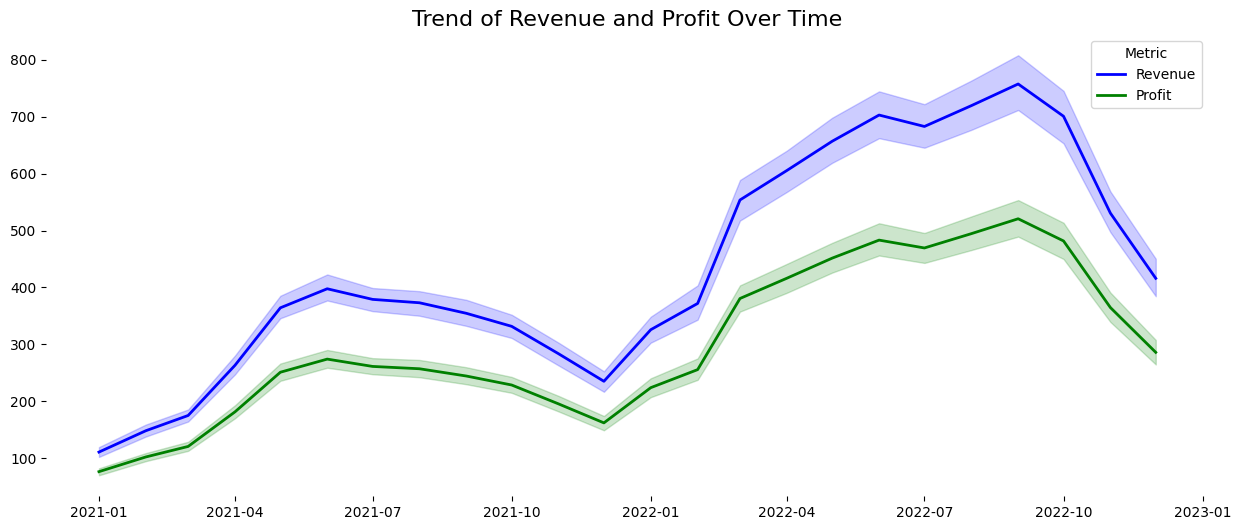

In [32]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=df, x='start_of_month', y='revenue', label='Revenue', color='blue', linewidth=2)
sns.lineplot(data=df, x='start_of_month', y='profit', label='Profit', color='green', linewidth=2)


plt.title("Trend of Revenue and Profit Over Time", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.legend(title='Metric', fontsize=10)

# Remove spines (borders)
sns.despine(left=True, bottom=True)


plt.show()

# Summary of Revenue and Profit Trends Over Time

## Observations:
1. **General Trend**:
   - Both revenue and profit exhibit a similar pattern over time, showing a correlated increase and decrease.

2. **Growth Phase**:
   - There is a significant upward trend in revenue and profit starting from early 2021, reaching a peak around mid-2022.

3. **Peak Values**:
   - Revenue and profit reached their highest points between mid-2022 and the third quarter of 2022.

4. **Decline Phase**:
   - A decline is observed in both metrics from the later part of 2022, continuing toward early 2023.

5. **Correlation**:
   - The close alignment of revenue and profit suggests a strong relationship between the two metrics over time.

## Conclusion:
The trend highlights seasonal or external factors influencing both revenue and profit. Further analysis could explore specific events or changes during peak and decline phases to identify the underlying causes.


In [33]:
casual = df[df['rider_type'] == 'casual']
registered = df[df['rider_type'] == 'registered']
casual.shape, registered.shape

((17379, 12), (17379, 12))

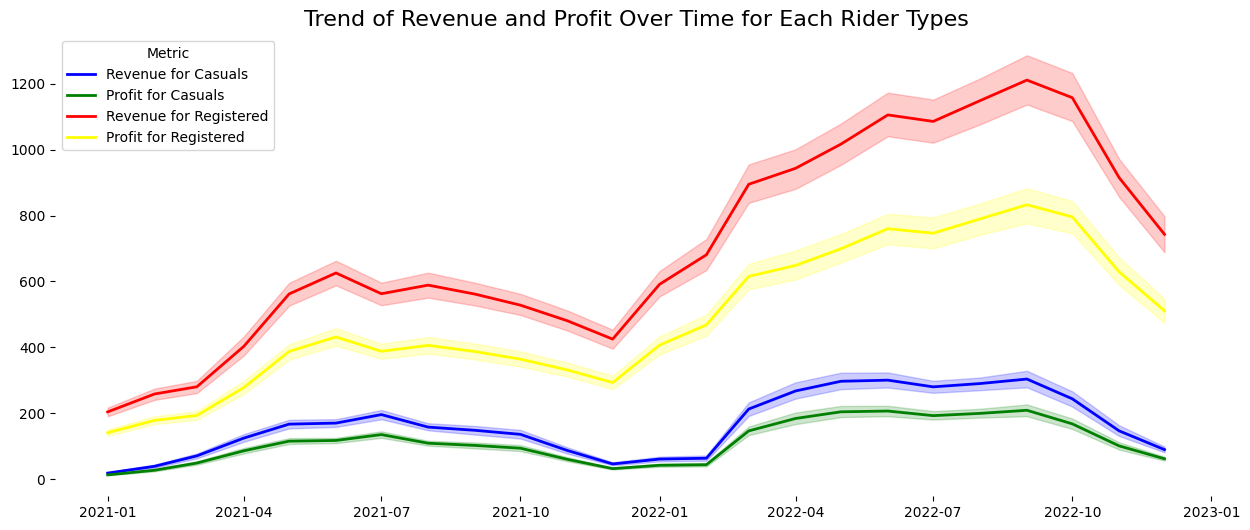

In [34]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=casual, x='start_of_month', y='revenue', label='Revenue for Casuals', color='blue', linewidth=2)
sns.lineplot(data=casual, x='start_of_month', y='profit', label='Profit for Casuals', color='green', linewidth=2)
sns.lineplot(data=registered, x='start_of_month', y='revenue', label='Revenue for Registered', color='red', linewidth=2)
sns.lineplot(data=registered, x='start_of_month', y='profit', label='Profit for Registered', color='yellow', linewidth=2)


plt.title("Trend of Revenue and Profit Over Time for Each Rider Types", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.legend(title='Metric', fontsize=10)

# Remove spines (borders)
sns.despine(left=True, bottom=True)


plt.show()

# Summary of Trend Analysis of Revenue and Profit for Rider Types (2021-2022)

## Key Findings:

1. **Revenue and Profit Trends**:
   - Registered Riders generate consistently higher revenue and profit compared to Casual Riders.
   - Seasonal trends are evident, with peaks around Q3 of each year.

2. **Comparison Between Metrics**:
   - The revenue-profit gap is larger for Registered Riders, showing higher cost-efficiency.
   - Casual Riders exhibit smaller margins, with revenue and profit closer in value.

3. **Temporal Patterns**:
   - Metrics show a dip in early 2022, recovering to their highest levels by Q3 2022, followed by a decline by January 2023.

4. **Seasonal Influence**:
   - Mid-year peaks suggest seasonality impacts, likely due to increased ridership during warmer months or holiday seasons.

5. **Strategic Implications**:
   - Focus on converting Casual Riders to Registered Riders to maximize profitability.
   - Explore seasonal promotions to capitalize on peak ridership periods.


## Conclusion:
The analysis highlights Registered Riders as the primary contributors to revenue and profit, with noticeable seasonal variations driving trends. Leveraging seasonal peaks and converting Casual Riders to Registered Riders can significantly enhance profitability and operational efficiency.